In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns #Visualization
from sklearn.linear_model import LinearRegression

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!ls

Data_Train.xlsx  Sample_submission.xlsx  xyz.csv
kaggle.json	 Test_set.xlsx		 zzz.csv


In [ ]:
train = pd.read_excel('Data_Train.xlsx')
test  = pd.read_excel('Test_set.xlsx') 
print('The shape of Train Data')
print('\nNumber of rows and columns in the data set: ',train.shape)
print('The shape of Test Data')
print('\nNumber of rows and columns in the data set: ',test.shape)

The shape of Train Data

Number of rows and columns in the data set:  (10683, 11)
The shape of Test Data

Number of rows and columns in the data set:  (2671, 10)


In [ ]:
print(train.info)

<bound method DataFrame.info of            Airline Date_of_Journey    Source  ... Total_Stops Additional_Info  Price
0           IndiGo      24/03/2019  Banglore  ...    non-stop         No info   3897
1        Air India       1/05/2019   Kolkata  ...     2 stops         No info   7662
2      Jet Airways       9/06/2019     Delhi  ...     2 stops         No info  13882
3           IndiGo      12/05/2019   Kolkata  ...      1 stop         No info   6218
4           IndiGo      01/03/2019  Banglore  ...      1 stop         No info  13302
...            ...             ...       ...  ...         ...             ...    ...
10678     Air Asia       9/04/2019   Kolkata  ...    non-stop         No info   4107
10679    Air India      27/04/2019   Kolkata  ...    non-stop         No info   4145
10680  Jet Airways      27/04/2019  Banglore  ...    non-stop         No info   7229
10681      Vistara      01/03/2019  Banglore  ...    non-stop         No info  12648
10682    Air India       9/05/201

In [ ]:
print(test.info)

<bound method DataFrame.info of                 Airline  ...              Additional_Info
0           Jet Airways  ...                      No info
1                IndiGo  ...                      No info
2           Jet Airways  ...  In-flight meal not included
3     Multiple carriers  ...                      No info
4              Air Asia  ...                      No info
...                 ...  ...                          ...
2666          Air India  ...                      No info
2667             IndiGo  ...                      No info
2668        Jet Airways  ...                      No info
2669          Air India  ...                      No info
2670  Multiple carriers  ...                      No info

[2671 rows x 10 columns]>


In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
print(train.dtypes)


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [ ]:
print(test.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


In [ ]:
print('Null values in Train data\n\n')
print(train.isnull().sum())
print('\n\nNull values in Test data\n\n')
print(test.isnull().sum())

Null values in Train data


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


Null values in Test data


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [ ]:
train.dropna(inplace=True)

In [ ]:
print('Null values in Train data\n\n')
print(train.isnull().sum())

Null values in Train data


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [ ]:
train['Journey_Day'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.day
train['Journey_Month'] = pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.month
train['weekday']= pd.to_datetime(train.Date_of_Journey, format='%d/%m/%Y').dt.weekday

test['Journey_Day'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.day
test['Journey_Month'] = pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.month
test['weekday']= pd.to_datetime(test.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [ ]:
train.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
test.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)


In [ ]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'weekday'],
      dtype='object')

In [ ]:
def duration(test):
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
        mint=(int)(total[1][:-1])
        hrs=hrs+mint
    test=str(hrs)
    return test
train['Duration']=train['Duration'].apply(duration)
test['Duration']=test['Duration'].apply(duration)


In [ ]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
train['Dep_Time']=train['Dep_Time'].apply(deparrtime)
test['Dep_Time']=test['Dep_Time'].apply(deparrtime)
train['Arrival_Time']=train['Arrival_Time'].apply(deparrtime)
test['Arrival_Time']=test['Arrival_Time'].apply(deparrtime)

In [ ]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        x.strip()
        stps=x.split(' ')[0]
        x=stps
    return x
train['Total_Stops']=train['Total_Stops'].apply(stops)
test['Total_Stops']=test['Total_Stops'].apply(stops)


In [ ]:
pd.options.mode.chained_assignment = None 
for i in range(train.shape[0]):
    if(train.iloc[i]['Additional_Info']=='No info'):
        train.iloc[i]['Additional_Info']='No Info' 

In [ ]:
pd.options.mode.chained_assignment = None 
for i in range(test.shape[0]):
    if(test.iloc[i]['Additional_Info']=='No info'):
        test.iloc[i]['Additional_Info']='No Info' 

In [ ]:
train=train.drop(['Route'], axis=1) #we don't need it as we already have total_stops
test=test.drop(['Route'], axis=1)


In [ ]:
train.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,Night,170,0,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,Morning,Afternoon,445,2,No info,7662,1,5,2
2,Jet Airways,Delhi,Cochin,Morning,Night,1140,2,No info,13882,9,6,6
3,IndiGo,Kolkata,Banglore,Evening,Night,325,1,No info,6218,12,5,6
4,IndiGo,Banglore,New Delhi,Evening,Night,285,1,No info,13302,1,3,4


In [ ]:
test.head(5)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,Jet Airways,Delhi,Cochin,Evening,Night,655,1,No info,6,6,3
1,IndiGo,Kolkata,Banglore,Morning,Morning,240,1,No info,12,5,6
2,Jet Airways,Delhi,Cochin,Evening,Evening,1425,1,In-flight meal not included,21,5,1
3,Multiple carriers,Delhi,Cochin,Morning,Night,780,1,No info,21,5,1
4,Air Asia,Banglore,Delhi,Night,Night,170,0,No info,24,6,0


In [ ]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Dep_Time         10682 non-null  object
 4   Arrival_Time     10682 non-null  object
 5   Duration         10682 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10682 non-null  object
 8   Price            10682 non-null  int64 
 9   Journey_Day      10682 non-null  int64 
 10  Journey_Month    10682 non-null  int64 
 11  weekday          10682 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airl

In [ ]:
#price outlier check
Q1=train['Price'].quantile(0.25)
Q3=train['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

5277.0
12373.0
7096.0


In [ ]:
train=train[~((train['Price']>Q3+1.5*IQR)|(train['Price']<Q1-1.5*IQR))]

In [ ]:
train.shape

(10588, 12)

In [ ]:
train["Duration"] = train["Duration"].astype(int)
test["Duration"] = test["Duration"].astype(int)
train["Journey_Day"] = train["Journey_Day"].astype(object)
test["Journey_Day"] = test["Journey_Day"].astype(object)
train["Journey_Month"] = train["Journey_Month"].astype(object)
test["Journey_Month"] = test["Journey_Month"].astype(object)
train["weekday"] = train["weekday"].astype(object)
test["weekday"] = test["weekday"].astype(object)

In [ ]:
colnames = list(train.columns)
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if train[col].dtype==object:
        train[col]= label_encoder.fit_transform(train[col]) 

In [ ]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,5,3897,8,0,6
1,1,3,0,2,0,445,2,5,7662,0,2,2
2,4,2,1,2,3,1140,2,5,13882,3,3,6
3,3,3,0,1,3,325,1,5,6218,4,2,6
4,3,0,5,1,3,285,1,5,13302,0,0,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10588 non-null  int64
 1   Source           10588 non-null  int64
 2   Destination      10588 non-null  int64
 3   Dep_Time         10588 non-null  int64
 4   Arrival_Time     10588 non-null  int64
 5   Duration         10588 non-null  int64
 6   Total_Stops      10588 non-null  int64
 7   Additional_Info  10588 non-null  int64
 8   Price            10588 non-null  int64
 9   Journey_Day      10588 non-null  int64
 10  Journey_Month    10588 non-null  int64
 11  weekday          10588 non-null  int64
dtypes: int64(12)
memory usage: 1.1 MB


In [ ]:
train["weekday"] = train["weekday"].astype(object)
train["Dep_Time"] = train["Dep_Time"].astype(object)
train["Airline"]=train["Airline"].astype(object)
train["Source"]=train["Source"].astype(object)
train["Destination"]=train["Destination"].astype(object)
train["Arrival_Time"]=train["Arrival_Time"].astype(object)
train["Total_Stops"]=train["Total_Stops"].astype(object)
train["Additional_Info"]=train["Additional_Info"].astype(object)
train["Journey_Day"]=train["Journey_Day"].astype(object)
train["Journey_Month"]=train["Journey_Month"].astype(object)

In [ ]:
train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,3,0,5,3,3,170,0,5,3897,8,0,6
1,1,3,0,2,0,445,2,5,7662,0,2,2
2,4,2,1,2,3,1140,2,5,13882,3,3,6
3,3,3,0,1,3,325,1,5,6218,4,2,6
4,3,0,5,1,3,285,1,5,13302,0,0,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10588 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10588 non-null  object
 1   Source           10588 non-null  object
 2   Destination      10588 non-null  object
 3   Dep_Time         10588 non-null  object
 4   Arrival_Time     10588 non-null  object
 5   Duration         10588 non-null  int64 
 6   Total_Stops      10588 non-null  object
 7   Additional_Info  10588 non-null  object
 8   Price            10588 non-null  int64 
 9   Journey_Day      10588 non-null  object
 10  Journey_Month    10588 non-null  object
 11  weekday          10588 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [ ]:
colnames = list(test.columns)
from sklearn import preprocessing 


label_encoder = preprocessing.LabelEncoder() 
  
for col in colnames:
    if test[col].dtype==object:
        test[col]= label_encoder.fit_transform(test[col]) 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          2671 non-null   int64
 1   Source           2671 non-null   int64
 2   Destination      2671 non-null   int64
 3   Dep_Time         2671 non-null   int64
 4   Arrival_Time     2671 non-null   int64
 5   Duration         2671 non-null   int64
 6   Total_Stops      2671 non-null   int64
 7   Additional_Info  2671 non-null   int64
 8   Journey_Day      2671 non-null   int64
 9   Journey_Month    2671 non-null   int64
 10  weekday          2671 non-null   int64
dtypes: int64(11)
memory usage: 229.7 KB


In [ ]:
test["weekday"] = test["weekday"].astype(object)
test["Dep_Time"] = test["Dep_Time"].astype(object)
test["Airline"]=test["Airline"].astype(object)
test["Source"]=test["Source"].astype(object)
test["Destination"]=test["Destination"].astype(object)
test["Arrival_Time"]=test["Arrival_Time"].astype(object)
test["Total_Stops"]=test["Total_Stops"].astype(object)
test["Additional_Info"]=test["Additional_Info"].astype(object)
test["Journey_Day"]=test["Journey_Day"].astype(object)
test["Journey_Month"]=test["Journey_Month"].astype(object)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Dep_Time         2671 non-null   object
 4   Arrival_Time     2671 non-null   object
 5   Duration         2671 non-null   int64 
 6   Total_Stops      2671 non-null   object
 7   Additional_Info  2671 non-null   object
 8   Journey_Day      2671 non-null   object
 9   Journey_Month    2671 non-null   object
 10  weekday          2671 non-null   object
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


In [ ]:
test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,weekday
0,4,2,1,1,3,655,1,5,2,3,3
1,3,3,0,2,2,240,1,5,4,2,6
2,4,2,1,1,1,1425,1,3,7,2,1
3,6,2,1,2,3,780,1,5,7,2,1
4,0,0,2,3,3,170,0,5,8,3,0


In [ ]:
from sklearn import preprocessing

In [ ]:
train["Duration"]= (train["Duration"] - train["Duration"].mean())/train["Duration"].std()   #standardizing
test["Duration"]= (test["Duration"] - test["Duration"].mean())/test["Duration"].std()

In [ ]:
import numpy as np

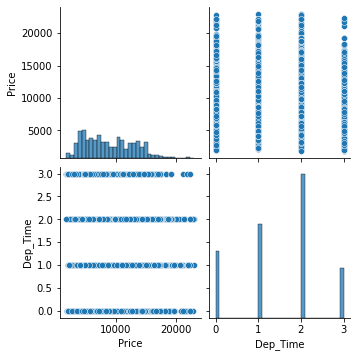

In [ ]:
sns.pairplot(data=train,vars=['Price','Dep_Time'])

In [ ]:
X=train.drop(["Price"],axis=1)
Y=train["Price"]
x=np.array(X)
y=np.array(Y)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

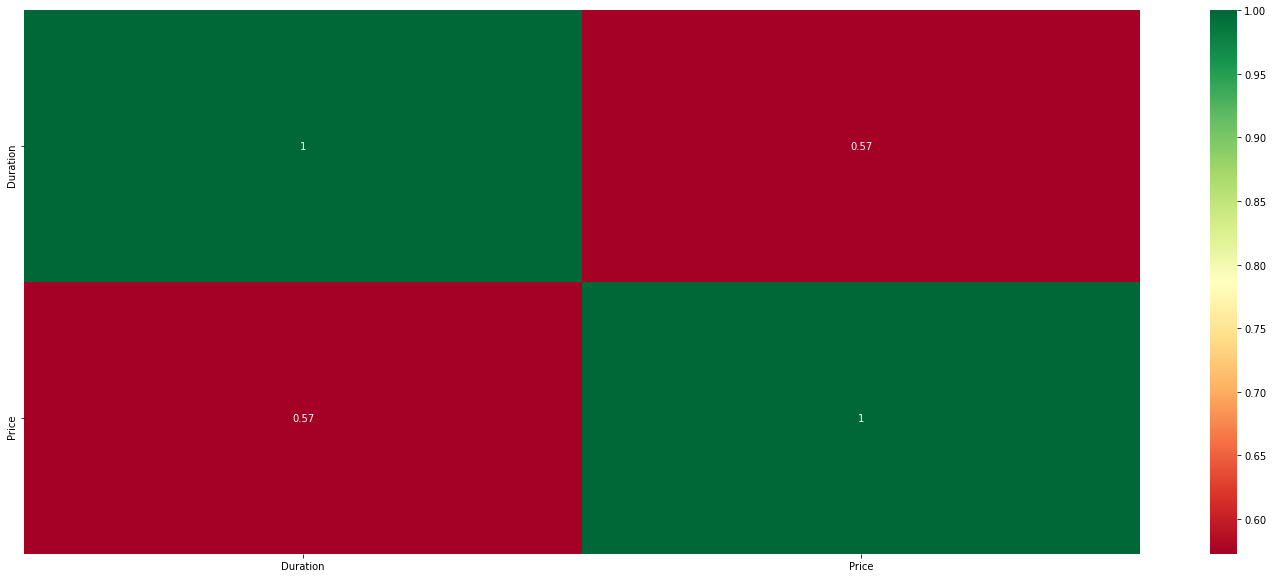

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(train.corr(),cmap='RdYlGn',annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
#KNN
number_of_neighbors = range(1,20)
params = {'n_neighbors':number_of_neighbors}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5) 
model.fit(x,y)
scores = cross_val_score(model, x, y, cv=5)
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

Cross validation score: 75.73% (+/- 3.03%)


In [ ]:
#Random Forest
parameters = {'n_estimators':[500], "max_features" : ["auto", "log2", "sqrt"],"bootstrap": [True, False]}
clf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=-1)
clf.fit(x, y)
scores = cross_val_score(clf, x, y, cv=5)
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Cross validation score: 90.03% (+/- 1.08%)


In [ ]:
x=np.array(test)

In [ ]:
ypred=clf.predict(x)

In [ ]:
test= pd.read_excel('Test_set.xlsx')
test["Price"]=ypred

In [ ]:
test=test.drop(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],axis=1)

In [ ]:
test.head()

,Price
0,14714.8400
1,4490.6780
2,12898.0000
3,12733.1811
4,3665.3860
